In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Importing Libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

DATASETS_PATH='/home/mx19/datasets/various_datasets'

## References 
# https://blog.paperspace.com/dataloaders-abstractions-pytorch/
# https://console.paperspace.com/gcn-team/notebook/rltcpncddf4ecz?file=A%20Comprehensive%20Guide%20to%20Data%20Loaders%20and%20Abstractions%20in%20PyTorch.ipynb
# https://github.com/ncullen93/torchsample/blob/master/examples/Transforms%20with%20Pytorch%20and%20Torchsample.ipynb
# https://towardsdatascience.com/augmentation-for-image-classification-24ffcbc38833
# https://github.com/neerjad/DeepLearning/blob/master/ImageAugmentation-Copy1.ipynb
# https://nextjournal.com/gkoehler/pytorch-mnist

## MNIST
> MNIST is a collection of 28x28 images of Digits between 0-9, with 60k training images and 10k testing images. The images are grayscale, so there is only a single channel dimension (1x28x28)


In [2]:
batch_size_train = 64
batch_size_test = 100

device = "cuda" if torch.cuda.is_available() else "cpu"
#kwargs = {'num_workers': 0, 'pin_memory': True} if device=='cuda' else {}

#################
### TRAIN SETS 
train_tranforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])

train_datasets = torchvision.datasets.MNIST(
    DATASETS_PATH, 
    train=True, 
    download=True,
    transform=train_tranforms
    )

train_loader = torch.utils.data.DataLoader(
    train_datasets,
    batch_size=batch_size_train, 
    shuffle=True
    )


#################
### TEST SETS 
test_transforms= torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    torchvision.transforms.Resize(256),
    #torchvision.transforms.RandomCrop(100),
    torchvision.transforms.RandomHorizontalFlip(p=0.9)
    ])

test_datasets = torchvision.datasets.MNIST(
    DATASETS_PATH, 
    train=False, 
    download=True,
    transform=test_transforms
    )
        
test_loader = torch.utils.data.DataLoader(
    test_datasets,
    batch_size=batch_size_test, 
    shuffle=False #=True
    )



/home/mx19/anaconda3/envs/codeVE/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1640860641607/work/torch/csrc/utils/tensor_numpy.cpp:183.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 1, 256, 256])
torch.Size([100])


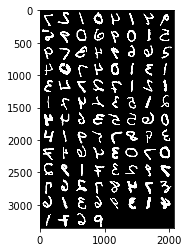

Ground truth: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])


In [3]:

######################
## Visualising Dataset

def grid_imshow(grimg):
    #grimg = grimg / 2 + 0.5
    plt.figure()
    npgrimg = grimg.numpy()
    plt.imshow(np.transpose(npgrimg, (1, 2, 0)), cmap='gray', interpolation='none')
    plt.show()
    
dataiter = iter(test_loader)

images, labels = dataiter.next()    
print(images.size())#torch.Size([100, 1, 28, 28])
print(labels.size())#torch.Size([100])

grid_images=torchvision.utils.make_grid(images) #print(grid_images.size())#torch.Size([3, 392, 242])
grid_imshow(grid_images)
print(f'Ground truth: {labels}')


# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


EPOCH_IDX: 1
 batch_idx:0


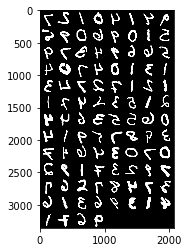

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 batch_idx:50


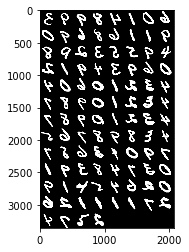

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


EPOCH_IDX: 2
 batch_idx:0


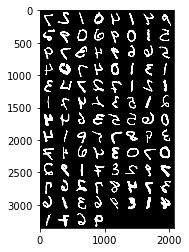

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 batch_idx:50


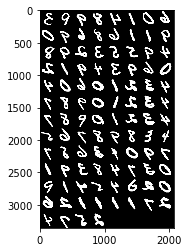

In [4]:
n_epochs = 2

def train(epoch):
    for batch_idx, (image_batch, label_batch) in enumerate(test_loader):
        if batch_idx % 50 == 0:
            print(f' batch_idx:{batch_idx}')
            #print(image_batch.size()) #torch.Size([64, 1, 28, 28])
            #print(target_batch.size()) #torch.Size([64])
            
            grid_images=torchvision.utils.make_grid(image_batch) #print(grid_images.size())#torch.Size([3, 392, 242])
            grid_imshow(grid_images)

      
            #batch_size_train = 64
            #samples will be a 64 x D dimensional tensor
            #feed it to your neural network model
    

for epoch_idx in range(1, n_epochs + 1):
    print(f'EPOCH_IDX: {epoch_idx}')
    train(epoch_idx)



# MedNIST
Read image filenames from the dataset folders
First of all, check the dataset files and show some statistics.
There are 6 folders in the dataset: Hand, AbdomenCT, CXR, ChestCT, BreastMRI, HeadCT,
which should be used as the labels to train our classification model.

In [5]:

from monai.apps import download_and_extract
import PIL

resource = "https://drive.google.com/uc?id=1QsnnkvZyJPcbRoV_ArW8SnE1OTuoVbKE"
md5 = "0bc7306e7427e00ad1c5526a6677552d"

compressed_file = os.path.join(DATASETS_PATH, "MedNIST.tar.gz")
data_dir = os.path.join(DATASETS_PATH, "MedNIST")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, DATASETS_PATH, md5)

In [6]:
class_names = sorted(x for x in os.listdir(data_dir)
                     if os.path.isdir(os.path.join(data_dir, x)))
num_class = len(class_names)
image_files = [
    [
        os.path.join(data_dir, class_names[i], x)
        for x in os.listdir(os.path.join(data_dir, class_names[i]))
    ]
    for i in range(num_class)
]
num_each = [len(image_files[i]) for i in range(num_class)]
image_files_list = []
image_class = []
for i in range(num_class):
    image_files_list.extend(image_files[i])
    image_class.extend([i] * num_each[i])
num_total = len(image_class)
image_width, image_height = PIL.Image.open(image_files_list[0]).size

print(f"Total image count: {num_total}")
print(f"Image dimensions: {image_width} x {image_height}")
print(f"Label names: {class_names}")
print(f"Label counts: {num_each}")

Total image count: 58954
Image dimensions: 64 x 64
Label names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label counts: [10000, 8954, 10000, 10000, 10000, 10000]


0 9735
1 54032
2 29375
3 18458
4 51255
5 41331
6 48332
7 56476
8 25465
9 42827
10 55480
11 54167
12 35074
13 31336
14 36046
15 18128


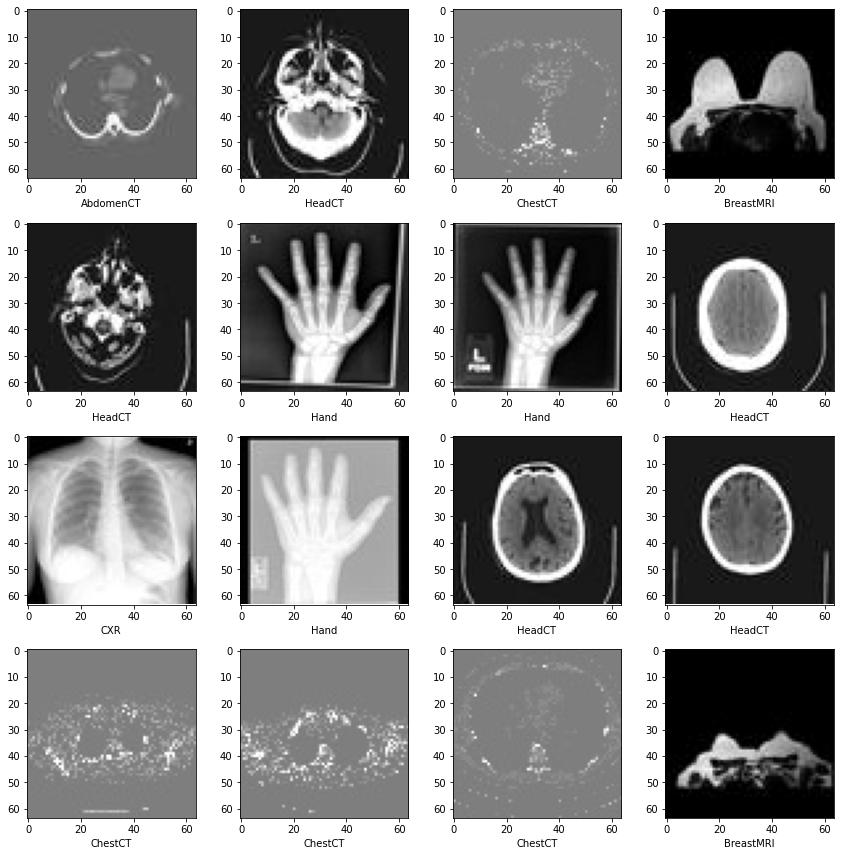

In [7]:
plt.subplots(4, 4, figsize=(12, 12))
for i, k in enumerate(np.random.randint(num_total, size=16)):
    print(i,k)
    im = PIL.Image.open(image_files_list[k])
    arr = np.array(im)
    plt.subplot(4, 4, i + 1)
    plt.xlabel(class_names[image_class[k]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [8]:
#Prepare training, validation and test data lists
#Randomly select 10% of the dataset as validation and 10% as test.

val_frac = 0.1
test_frac = 0.1
length = len(image_files_list)
indices = np.arange(length)
np.random.shuffle(indices)

test_split = int(test_frac * length)
val_split = int(val_frac * length) + test_split
test_indices = indices[:test_split]
val_indices = indices[test_split:val_split]
train_indices = indices[val_split:]

train_x = [image_files_list[i] for i in train_indices]
train_y = [image_class[i] for i in train_indices]
val_x = [image_files_list[i] for i in val_indices]
val_y = [image_class[i] for i in val_indices]
test_x = [image_files_list[i] for i in test_indices]
test_y = [image_class[i] for i in test_indices]

print(
    f"Training count: {len(train_x)}, Validation count: "
    f"{len(val_x)}, Test count: {len(test_x)}")

Training count: 47164, Validation count: 5895, Test count: 5895


In [9]:
#Define MONAI transforms, Dataset and Dataloader to pre-process data


from monai.transforms import (
    Activations,
    AddChannel,
    AsDiscrete,
    Compose,
    LoadImage,
    RandFlip,
    RandRotate,
    RandZoom,
    ScaleIntensity,
    EnsureType,
)


train_transforms = Compose(
    [
        LoadImage(image_only=True),
        AddChannel(),
        ScaleIntensity(),
        RandRotate(range_x=np.pi / 12, prob=0.5, keep_size=True),
        RandFlip(spatial_axis=0, prob=0.5),
        RandZoom(min_zoom=0.9, max_zoom=1.1, prob=0.5),
        EnsureType(),
    ]
)

val_transforms = Compose(
    [LoadImage(image_only=True), AddChannel(), ScaleIntensity(), EnsureType()])

y_pred_trans = Compose([EnsureType(), Activations(softmax=True)])
y_trans = Compose([EnsureType(), AsDiscrete(to_onehot=num_class)])


       ----------------------------------------------------------
       Grid size torch.Size([3, 2510, 530])


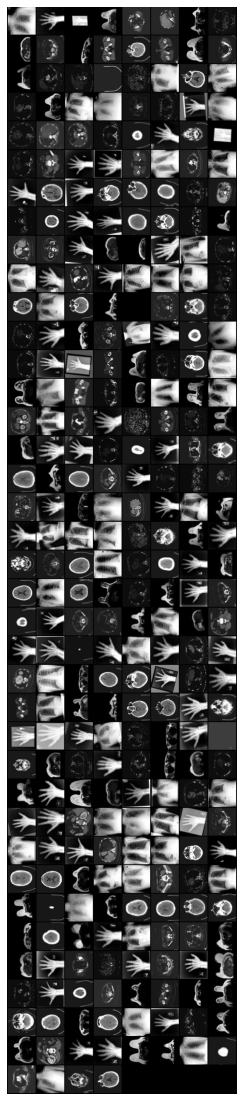

       ----------------------------------------------------------
       Grid size torch.Size([3, 2510, 530])


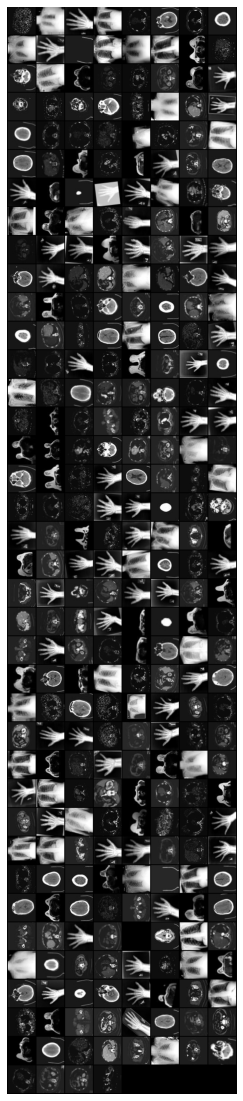

In [10]:
class MedNISTDataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]


train_ds = MedNISTDataset(train_x, train_y, train_transforms) # returning mage_files[index] and labels[index]
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=300, shuffle=True, num_workers=10)

val_ds = MedNISTDataset(val_x, val_y, val_transforms)  # returning mage_files[index] and labels[index]
#print(val_ds.__len__()) #5895
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=300, num_workers=10)

test_ds = MedNISTDataset(test_x, test_y, val_transforms)
#print(test_ds.__len__()) #5895
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=300, num_workers=10)


for batch_idx, sample_batched in enumerate(train_loader):
    
    if batch_idx <= 1:
        print(f'       ----------------------------------------------------------')
        #print(f'       BATCH_INDEX: {batch_idx} SAMPLE_IDX_LABELS: {sample_batched[1]}')
        sample_batched_labels=sample_batched[1]
        #print(sample_batched_labels.shape) #torch.Size([batch_size])
        sample_batched=sample_batched[0]
        #print(batch_image.shape) #torch.Size([batch_size, 1, 64, 64])

        plt.figure(figsize =(20,20) )
        plt.tight_layout()
        grid = torchvision.utils.make_grid(sample_batched)
        print(f'       Grid size {grid.size()}' )
        plt.imshow( grid.cpu().detach().numpy().transpose(1, 2, 0) )
        #plt.title(f'Batch from dataloader {i_batch}; Label: {labelnames[data_clip_label]}')
        plt.axis('off')
        plt.ioff()
        plt.show()




##  CIFAR-10 
> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

https://www.cs.toronto.edu/~kriz/cifar.html
    

In [12]:

# Denfining Transforms
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


# Loading Dataset
trainset = torchvision.datasets.CIFAR10(
    root=DATASETS_PATH, 
    train=True,
    download=True, 
    transform=transform
    )
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=4,
    shuffle=False
    )

Files already downloaded and verified


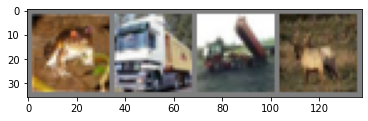

 frog truck truck  deer


In [13]:
# Visualising Dataset

import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()    

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
# Creating Custom Datasets in PyTorch

# Import Libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms


# Defining Custom Dataset
class SquareDataset(Dataset):
     def __init__(self, a=0, b=1):
         super(Dataset, self).__init__()
         assert a <= b
         self.a = a
         self.b = b
        
     def __len__(self):
         return self.b - self.a + 1
        
     def __getitem__(self, index):
        assert self.a <= index <= self.b
        return index, index**2



In [15]:
# Loading Custom Dataset
data_train = SquareDataset(a=1,b=64)
data_train_loader = DataLoader(data_train, batch_size=64, shuffle=True)
print(len(data_train))

64
